# Linear Regression **Numpy only Vs. Sklearn**

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

## Dataset

In [139]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [140]:
X, y = load_diabetes(return_X_y=True)

In [141]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [142]:
pd.DataFrame(y).head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Metrics

In [145]:
def mse_numpy(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score_numpy(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

## Numpy only

In [146]:
import numpy as np

In [147]:
class LinearRegressionNp:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        """
        X: shape (n_samples, n_features)
        y: shape (n_samples,)
        """

        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        XtX = X_b.T @ X_b

        XtX_inv = np.linalg.pinv(XtX)

        self.weights = XtX_inv @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.weights

In [148]:
lr_np = LinearRegressionNp() # closed-form
lr_np.fit(X_train_scaled, y_train)

y_pred_np = lr_np.predict(X_test_scaled)

In [149]:
np_loss = mse_numpy(y_test, y_pred_np)
np_r2 = r2_score_numpy(y_test, y_pred_np)

print(f"NumPy MSE:", np_loss)
print(f"NumPy R2:", np_r2)

NumPy MSE: 2821.7509810013103
NumPy R2: 0.4772897164322618


## Sklearn

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
lr_sk = LinearRegression() # closed-form
lr_sk.fit(X_train_scaled, y_train)

y_pred_sk = lr_sk.predict(X_test_scaled)

In [152]:
sk_loss = mse_numpy(y_test, y_pred_sk)
sk_r2 = r2_score_numpy(y_test, y_pred_sk)

print(f"Sklearn MSE:", sk_loss)
print(f"Sklearn R2:", sk_r2)

Sklearn MSE: 2821.750981001311
Sklearn R2: 0.4772897164322617


## Visualization & Analysis

In [153]:
print(np_loss < sk_loss, ':', np.abs(np_loss - sk_loss))
print(np_r2 > sk_r2, ':', np.abs(np_r2 - sk_r2))

True : 9.094947017729282e-13
True : 1.1102230246251565e-16


In [154]:
def plot_predictions(y_true, y_pred, title, filename):
    plt.figure(figsize=(5,5))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             '--r')
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def plot_residuals(y_true, y_pred, title, filename):
    residuals = y_true - y_pred

    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

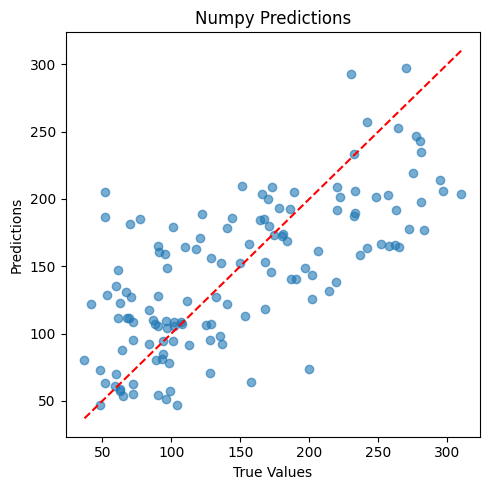

In [156]:
plot_predictions(y_test, y_pred_np, 'Numpy Predictions', 'numpy_predictions.png')

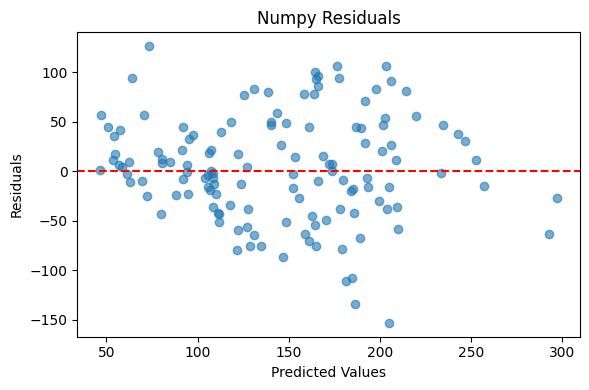

In [157]:
plot_residuals(y_test, y_pred_np, 'Numpy Residuals', 'numpy_residuals.png')